<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/Decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Classification Trees in Python

Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. 

## 1. Collect the Data

In [5]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
loan = pd.read_csv("loan.csv")
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


## 2. Explore the Data

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [8]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


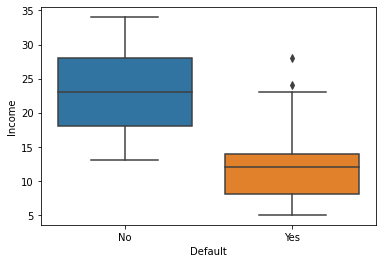

In [10]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Income')
# It shows that people who have higher income has lesser probability to default than those with lower income.

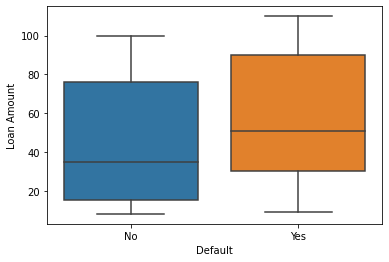

In [12]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount')
# It shows that people who have defaulted have slightly higher loan amount than those who did not default.

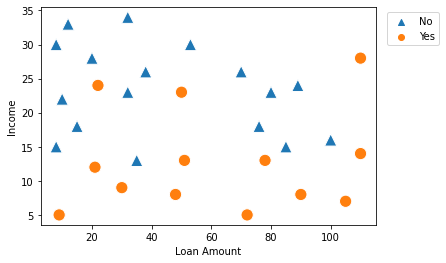

In [13]:
ax = sns.scatterplot(data = loan, 
                     x = 'Loan Amount', 
                     y = 'Income', 
                     hue = 'Default', 
                     style = 'Default', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data

In [14]:
# Outcome variable
y = loan[['Default']]

In [15]:
# Independent variables
X = loan[['Income', 'Loan Amount']]

In [17]:
# Splitting the data between train and test, we are also randomly splitting the data to avoid any biases.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 1234) 

In [19]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

## 4. Train and Evaluate the Classification Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier_base = DecisionTreeClassifier(random_state = 1234)

In [32]:
model_base = classifier_base.fit(X_train, y_train)

In [33]:
model_base.score(X_test, y_test)

0.5

## 5. Visualize the Classification Tree

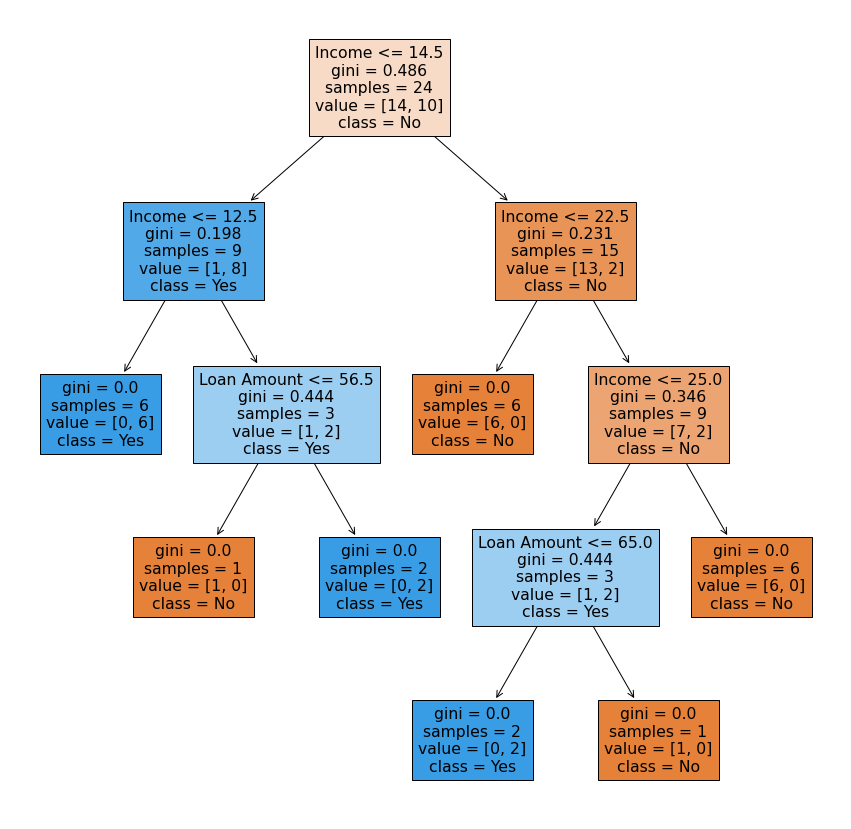

In [34]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model_base, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True);

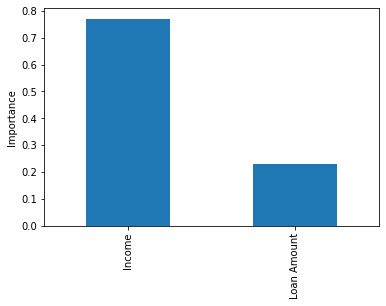

In [35]:
importance = model_base.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

In [36]:
model_base.score(X_train, y_train)
# Clear sign of overfitting.

1.0

In [37]:
model_base.score(X_test, y_test)
# It shows poor fit.

0.5

## 6. Prune the Classification Tree

In [38]:
grid = {'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': range(1, 7)}

In [39]:
from sklearn.model_selection import GridSearchCV
classifier_prune = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier_prune, param_grid = grid)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': [2, 3, 4]})

In [40]:
model_prune_1 = gcv.best_estimator_
model_prune_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

In [42]:
model_prune_1.score(X_train, y_train)

0.875

In [41]:
model_prune_1.score(X_test, y_test)

0.8333333333333334

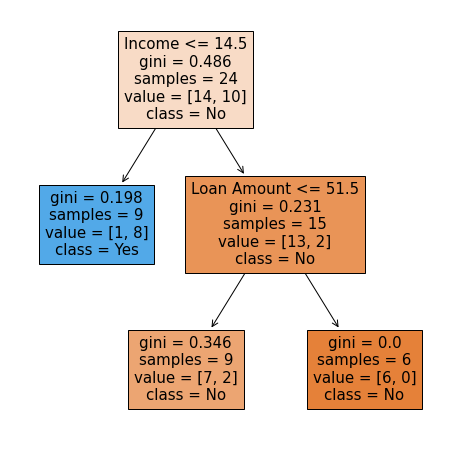

In [43]:
plt.figure(figsize = (8,8))
tree.plot_tree(model_prune_1, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True);